In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1269.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/623.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/820.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1354.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/45.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/369.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1711.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1173.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1488.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/436.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1409.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/71.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1055.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/215.jpg
/

In [2]:
#Give dataset path
train_path = '/kaggle/input/skin-cancer-malignant-vs-benign/data/train'
test_path = '/kaggle/input/skin-cancer-malignant-vs-benign/data/test'

In [3]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis

Working with 1440 images
Image examples: 
764.jpg


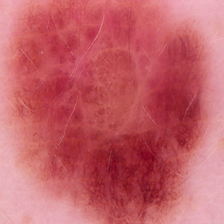

1700.jpg


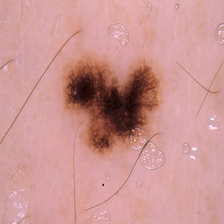

1786.jpg


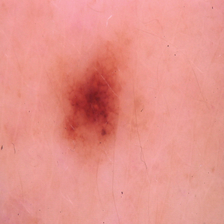

1075.jpg


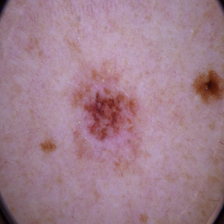

771.jpg


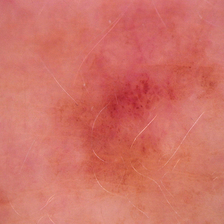

In [4]:
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(5):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
IMAGE_SIZE = [224, 224]

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
folders = glob('/kaggle/input/skin-cancer-malignant-vs-benign/data/train/*')

print(len(folders))

2


In [10]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [14]:

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [16]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(train_set,
                        validation_data=test_set,
                        epochs=10,
                        steps_per_epoch=5,
                        validation_steps=32,
                        callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
5/5 - 21s - loss: 2.7697 - accuracy: 0.6250 - val_loss: 1.5417 - val_accuracy: 0.8000

Epoch 00001: val_loss improved from inf to 1.54172, saving model to mymodel.h5
Epoch 2/10
5/5 - 3s - loss: 2.1119 - accuracy: 0.7375
Epoch 3/10
5/5 - 3s - loss: 2.4209 - accuracy: 0.7437
Epoch 4/10
5/5 - 3s - loss: 2.3626 - accuracy: 0.8062
Epoch 5/10
5/5 - 3s - loss: 2.2524 - accuracy: 0.7812
Epoch 6/10
5/5 - 3s - loss: 1.9900 - accuracy: 0.8062
Epoch 7/10
5/5 - 3s - loss: 1.5347 - accuracy: 0.8000
Epoch 8/10
5/5 - 3s - loss: 1.4751 - accuracy: 0.8062
Epoch 9/10
5/5 - 3s - loss: 1.9369 - accuracy: 0.7812
Epoch 10/10
5/5 - 3s - loss: 1.4472 - accuracy: 0.8062
Training completed in time:  0:00:51.958665


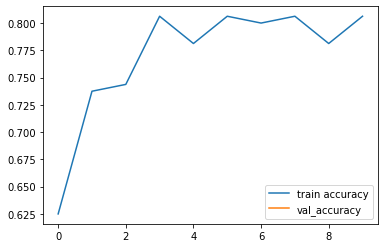

In [17]:
# accuracies
plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [18]:

import keras
import tensorflow as tf
def Classify_Image(target_img_path):
    img = keras.preprocessing.image.load_img(
    target_img_path, target_size=IMAGE_SIZE)
    
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    
    predictions = model.predict(img_array)
    result = [np.argmax(element) for element in predictions]
    print(result)
    
    if result == [0]:
        return "Benign"
    elif result == [1]:
        return "Malignant"
  
    else:
        return "We didnt find anything"

In [19]:
## Testing Some Outside World Images for Model
res = Classify_Image('/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1343.jpg')
print(res)

[0]
Benign


In [20]:
res = Classify_Image('/kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant/193.jpg')
print(res)

[0]
Benign
